In [24]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt  

In [30]:
class GeneralNeurons:
    def __init__(self,firingRate):
        self.firingRate= firingRate

    def Activate (self, stimulus_strength):
        activation_power= stimulus_strength*self.firingRate
        return activation_power


class SensoryNeuron (GeneralNeurons):
    def __init__(self, firingRate ,receptor_type):
        super().__init__(firingRate)
        self.receptor_type= receptor_type

        def Sense_stimulus(self, stimulus_strength):
            activation_power=super().Activate(stimulus_strength)
            return activation_power
        
class Motor_neuron (GeneralNeurons):
    def __init__(self, firingRate, target_muscle):
        super().__init__(firingRate)
        self.target_muscle=target_muscle

    def control_muscle(self,target_muscle,stimulus_strength):
        target_muscle_activation=super().Activate(stimulus_strength)
        return "the muscle f{target_muscle} fires:"+target_muscle_activation
    
class Photoreceptor (SensoryNeuron):
        def __init__(self, firingRate, receptor_type):
            super().__init__(firingRate, receptor_type="light")

        def light_detection(self,light_intensity):
            firing_Rate=super.Activation(light_intensity)
            return firing_Rate
 
class Mechanoreceptor (SensoryNeuron):
        def __init__(self, firingRate, receptor_type):
            super().__init__(firingRate, receptor_type="pressure")

        def light_detection(self,pressure_intensity):
            firing_Rate=super.Activation(pressure_intensity)
            return firing_Rate
        
class Alpha_motor_neuron(Motor_neuron):
    def __init__(self, firingRate, target_muscle):
          super().__init__(firingRate, target_muscle+"skeletal muscle")
          
    def control_muscle(self,target_muscle,stimulus_strength):
        target_muscle_activation=super().Activate(stimulus_strength)
        return f"the muscle {self.target_muscle} fires:"+target_muscle_activation

class Gamma_motor_neuron(Motor_neuron):
    def __init__(self, firingRate, target_muscle):
          super().__init__(firingRate, target_muscle+"muscle spindle")
          
    def control_muscle(self,target_muscle,stimulus_strength):
        target_muscle_activation=super().Activate(stimulus_strength)
        return f"the muscle {self.target_muscle} fires:"+target_muscle_activation

                                                                                                    

the correlation between price and RAM is  0.7402865271622694


/var/folders/8x/7f56j_wn1_z5d2_jmdd198_r0000gn/T/ipykernel_937/3386539439.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


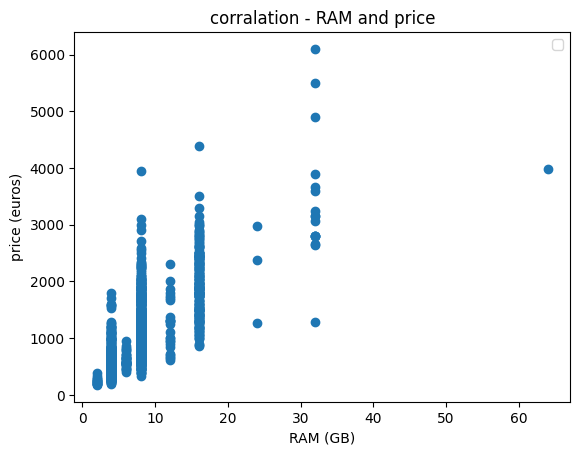

In [ ]:
file_path = "/Users/mayacohen/Downloads/laptop_price - dataset.csv"
data = pd.read_csv(file_path)
corr_RAM_and_price=data["RAM (GB)"].corr(data["Price (Euro)"])
print("the correlation between price and RAM is ",corr_RAM_and_price)
plt.scatter(data["RAM (GB)"],data["Price (Euro)"])
plt.xlabel("RAM (GB)")
plt.ylabel("price (euros)")
plt.title("corralation - RAM and price")
#x_vals = np.linspace(data["RAM (GB)"].min(), data["RAM (GB)"].max(), 100)
#slope, intercept = np.polyfit(data["RAM (GB)"], data["Price (Euro)"], 1)
#y_vals = slope * x_vals + intercept
#plt.plot(x_vals, y_vals, color="red", label="Regression Line")

plt.legend()
plt.show()
 


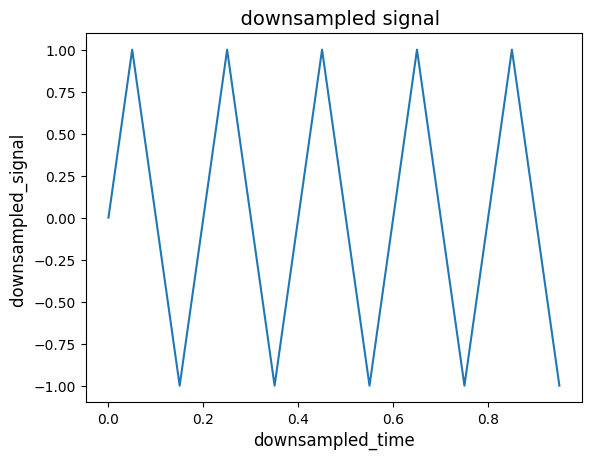

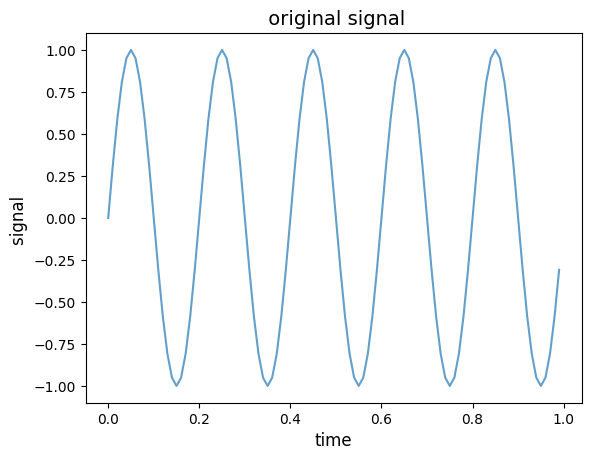

In [67]:
def Sin_wave(time,frequency=5,amplitude=1):
    signal= amplitude*np.sin(2*frequency*np.pi*time)
    # i created a sin function that i need to implememt every 0.01 seconds up to a second
    indexes_i_wanna_keep= set(np.arange(0,len(signal),5))
    max_indexes=set( np.where(signal==amplitude)[0])
    min_indexes= set(np.where(signal==-amplitude)[0])
    all_indexes_i_wanna_keep= sorted(set(indexes_i_wanna_keep.union(max_indexes).union(min_indexes)))    
    downsampled_signal = signal[all_indexes_i_wanna_keep]
    downsampled_time = time[all_indexes_i_wanna_keep]

    plt.plot(downsampled_time,downsampled_signal)
    plt.xlabel("downsampled_time", fontsize=12)
    plt.ylabel("downsampled_signal ", fontsize=12)
    plt.title("  downsampled signal", fontsize=14)
    plt.show()
    plt.plot(time, signal, alpha=0.7)
    plt.xlabel("time", fontsize=12)
    plt.ylabel("signal ", fontsize=12)
    plt.title(" original signal", fontsize=14)

    plt.show()

time= np.arange(0,1,0.01)
Sin_wave(time)





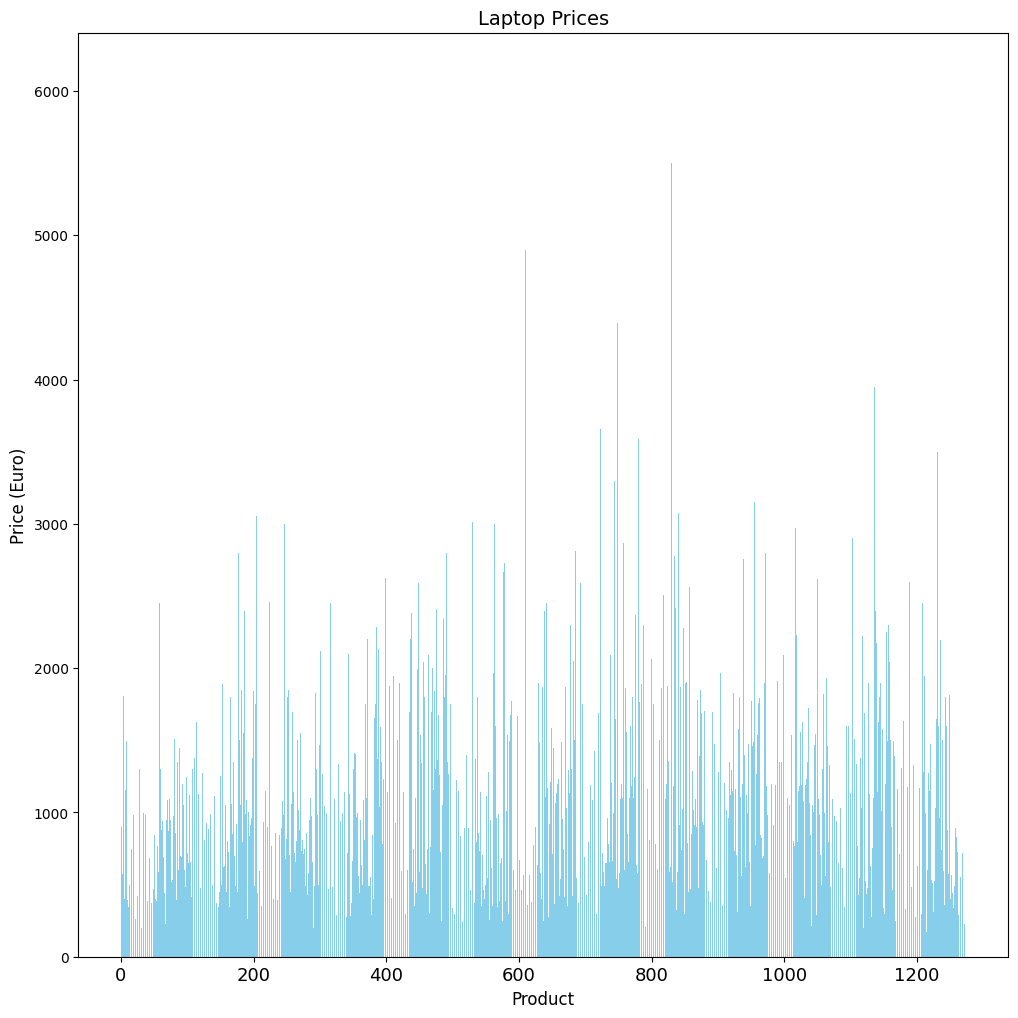

In [ ]:
file_path = "/Users/mayacohen/Downloads/laptop_price - dataset.csv"
data = pd.read_csv(file_path)
products = data.index
prices = data["Price (Euro)"]
plt.figure(figsize=(12,12))
plt.bar(products, prices, color="skyblue")
plt.xlabel("Product", fontsize=12)
plt.ylabel("Price (Euro)", fontsize=12)
plt.title("Laptop Prices", fontsize=14)
plt.xticks(fontsize=13)
plt.show()
ata = pd.read_csv(file_path)
average_prices = data.groupby("Company")["Price (Euro)"].mean()
highest_average_price = average_prices.max() 
 # The highest average price itself
most_expensive_company=average_prices.idxmax()
print("the company",most_expensive_company,"has the most expensive mean price:",highest_average_price)

['macos' 'no os' 'windows 10' 'mac os x' 'linux' 'android' 'windows 10 s'
 'chrome os' 'windows 7']


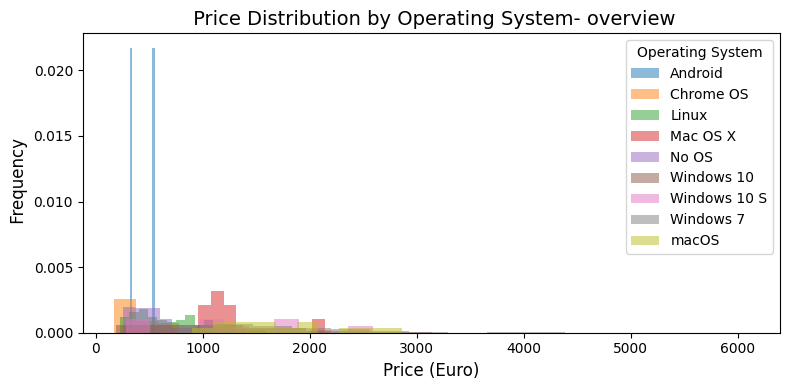

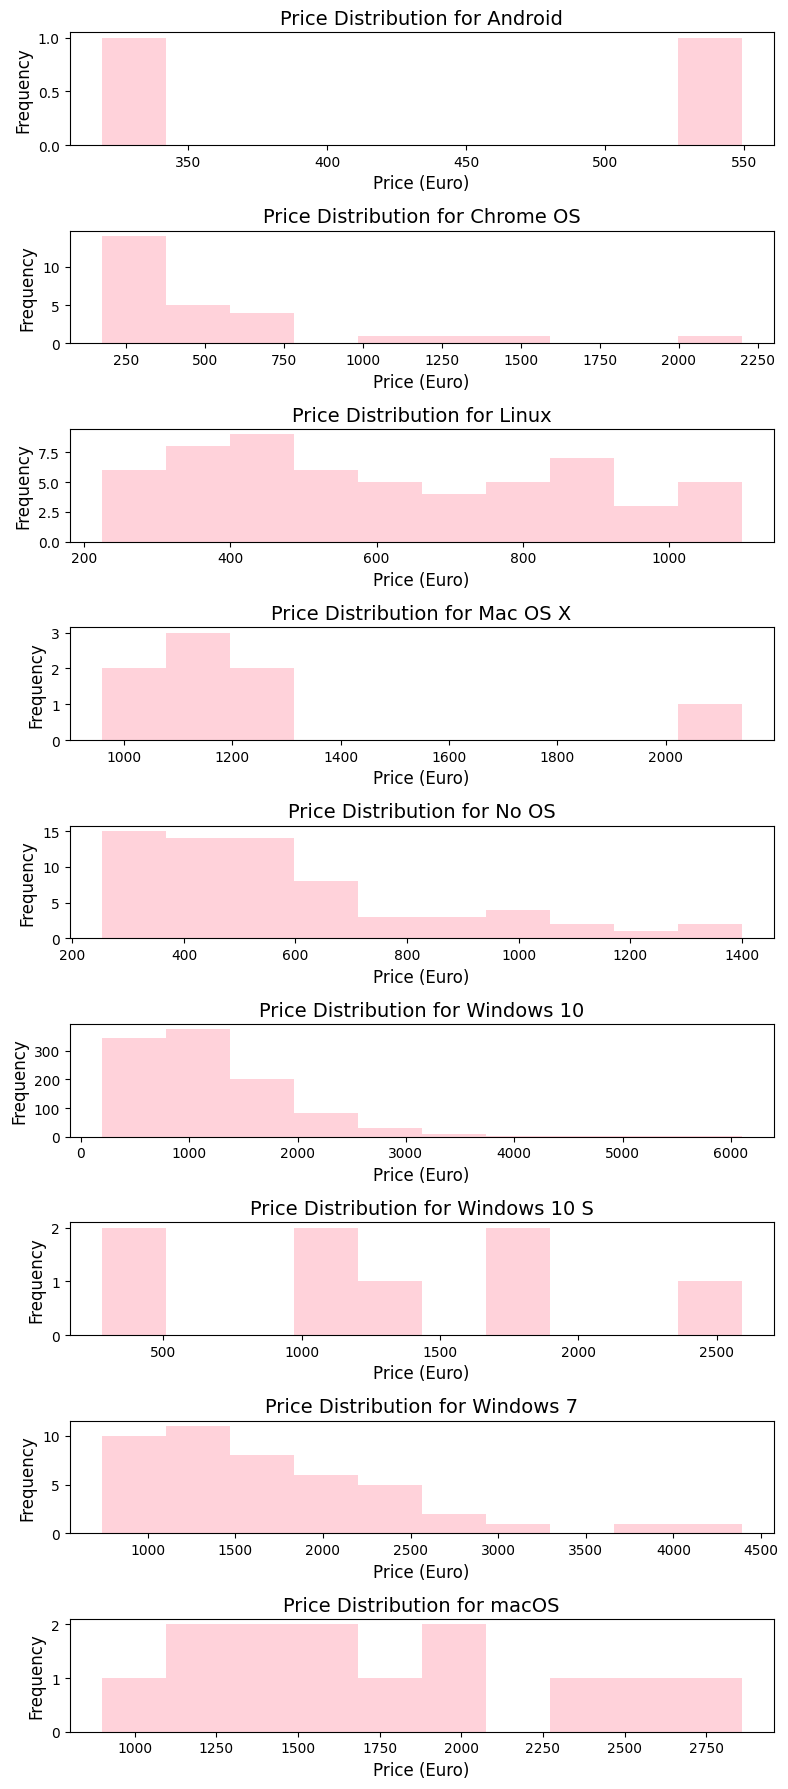

In [57]:

file_path = "/Users/mayacohen/Downloads/laptop_price - dataset.csv"
data = pd.read_csv(file_path)
op_sys_types=data["OpSys"].str.lower().replace(" ","").unique()
print(op_sys_types)
 
 #creating subplots for each Op Sys prouped by price
 #we need to know the number of subplots
num_op_sys = len(op_sys_types)
grouped_priceandop = data.groupby("OpSys")["Price (Euro)"]
print(grouped_priceandop)

#for each OP creating onr
plt.figure(figsize=(8,4))
for sys, prices in grouped_priceandop:
    plt.hist(prices,bins=10, label=sys,alpha=0.5, density=True)
plt.xlabel("Price (Euro)", fontsize=12)
plt.ylabel(" Frequency", fontsize=12)
plt.title(" Price Distribution by Operating System- overview", fontsize=14)
plt.legend(title="Operating System", fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

# Number of unique operating systems
op_sys_types = data["OpSys"].unique()
num_op_sys = len(op_sys_types)

# Create subplots
fig, axes = plt.subplots(num_op_sys, 1, figsize=(8, 2 * num_op_sys))  # Adjust the figure size

for ax, (sys, prices) in zip(axes, grouped_priceandop):
    ax.hist(prices, bins=10, alpha=0.7, color="pink")  # Single histogram per OS
    ax.set_title(f"Price Distribution for {sys}", fontsize=14)
    ax.set_xlabel("Price (Euro)", fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)

# Adjust layout for better display
plt.tight_layout()
plt.show()

the correlation between price and RAM is  0.7402865271622694


/var/folders/8x/7f56j_wn1_z5d2_jmdd198_r0000gn/T/ipykernel_937/3386539439.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


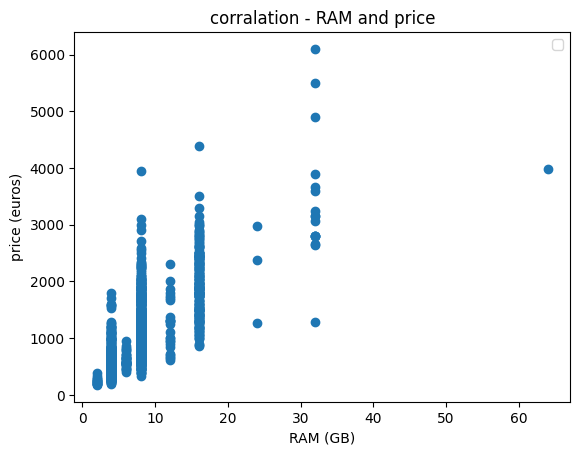

In [ ]:
file_path = "/Users/mayacohen/Downloads/laptop_price - dataset.csv"
data = pd.read_csv(file_path)
corr_RAM_and_price=data["RAM (GB)"].corr(data["Price (Euro)"])
print("the correlation between price and RAM is ",corr_RAM_and_price)
plt.scatter(data["RAM (GB)"],data["Price (Euro)"])
plt.xlabel("RAM (GB)")
plt.ylabel("price (euros)")
plt.title("corralation - RAM and price")
#x_vals = np.linspace(data["RAM (GB)"].min(), data["RAM (GB)"].max(), 100)
#slope, intercept = np.polyfit(data["RAM (GB)"], data["Price (Euro)"], 1)
#y_vals = slope * x_vals + intercept
#plt.plot(x_vals, y_vals, color="red", label="Regression Line")

plt.legend()
plt.show()
 


the correlation between price and RAM is  0.7402865271622694


/var/folders/8x/7f56j_wn1_z5d2_jmdd198_r0000gn/T/ipykernel_937/3386539439.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


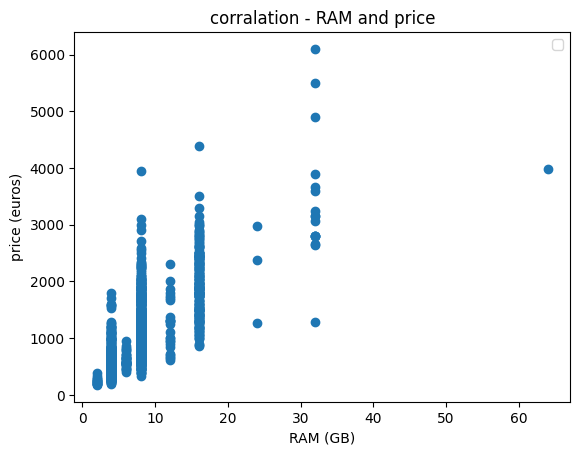

the correlation between price and RAM is  0.7402865271622694


/var/folders/8x/7f56j_wn1_z5d2_jmdd198_r0000gn/T/ipykernel_937/3386539439.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


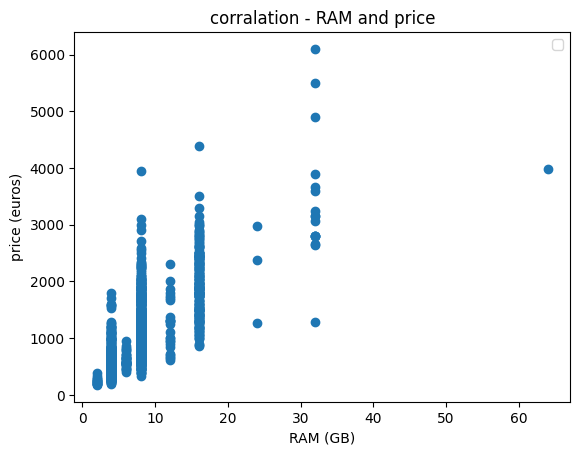

In [70]:
file_path = "/Users/mayacohen/Downloads/laptop_price - dataset.csv"
data = pd.read_csv(file_path)
# Create a list to store the extracted storage types
storage_types = []

# Iterate through each row in the "Memory" column
for memory in data["Memory"]:
    # Check if the value is not NaN and contains "GB"
    if isinstance(memory, str) and "GB" in memory:
        # Split the string at "GB" and get the part after
        after_gb = memory.split("GB")[1].strip()  # Take part after "GB" and strip spaces
        storage_types.append(after_gb) 
    else:
        storage_types.append("Unknown")

# Assign the list to a new column in the dataframe
data["Storage type"] = storage_types

# Print the updated dataframe to verify
print(data.head())

  Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

  CPU_Company       CPU_Type  CPU_Frequency (GHz)  RAM (GB)  \
0       Intel        Core i5                  2.3         8   
1       Intel        Core i5                  1.8         8   
2       Intel  Core i5 7200U                  2.5         8   
3       Intel        Core i7                  2.7        16   
4       Intel        Core i5                  3.1         8   

                Memory GPU_Company                GPU_Type  OpSys  \
0            128GB SSD       Intel  Iris Plus Graphics 640  macOS

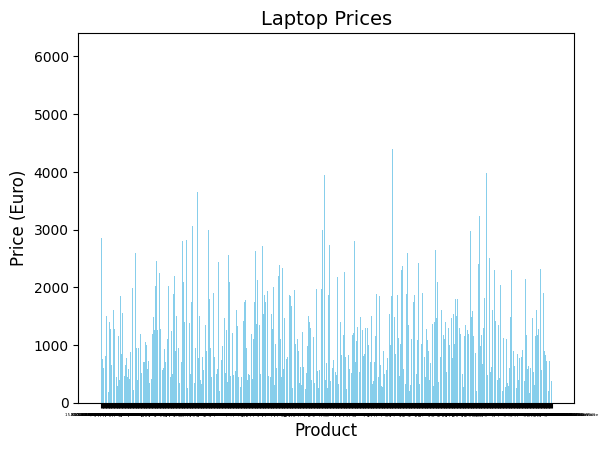

the company Razer has the most expensive mean price: 3346.1428571428573
  Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

  CPU_Company       CPU_Type  CPU_Frequency (GHz)  RAM (GB)  \
0       Intel        Core i5                  2.3         8   
1       Intel        Core i5                  1.8         8   
2       Intel  Core i5 7200U                  2.5         8   
3       Intel        Core i7                  2.7        16   
4       Intel        Core i5                  3.1         8   

                Memory GPU_Company                GPU_Type  Op

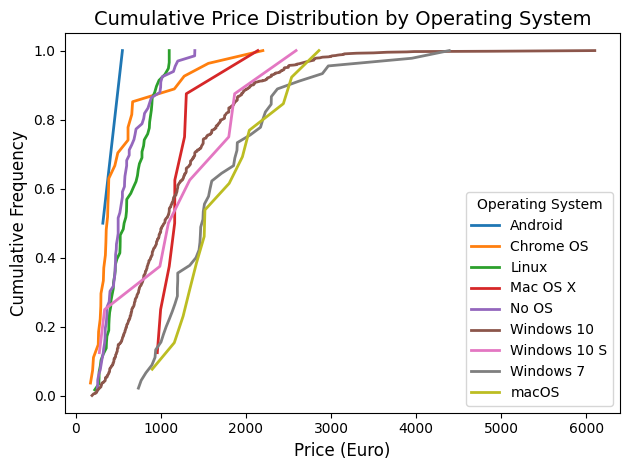

the correlation between price and RAM is  0.7402865271622694


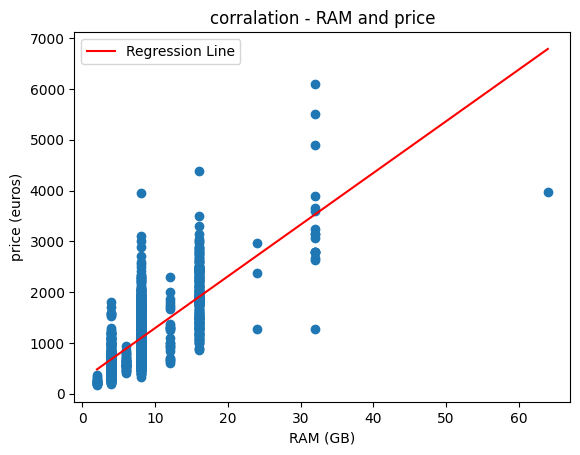

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1270              128GB SSD
1271              512GB SSD
1272     64GB Flash Storage
1273                1TB HDD
1274              500GB HDD
Name: Memory, Length: 1275, dtype: object


In [32]:
file_path = "/Users/mayacohen/Downloads/laptop_price - dataset.csv"
data = pd.read_csv(file_path)
products = (data["Product"])
prices = data["Price (Euro)"]
plt.bar(products, prices, color="skyblue")
plt.xlabel("Product", fontsize=12)
plt.ylabel("Price (Euro)", fontsize=12)
plt.title("Laptop Prices", fontsize=14)
plt.xticks(fontsize=3)
plt.show()
average_prices = data.groupby("Company")["Price (Euro)"].mean()
highest_average_price = average_prices.max() 
 # The highest average price itself
most_expensive_company=average_prices.idxmax()
print("the company",most_expensive_company,"has the most expensive mean price:",highest_average_price)
print(data.head())

op_sys_types=data["OpSys"].str.lower().replace(" ","").unique()
print(op_sys_types)
 
 #creating subplots for each Op Sys prouped by price
 #we need to know the number of subplots
num_op_sys = len(op_sys_types)
grouped_priceandop = data.groupby("OpSys")["Price (Euro)"]
print(grouped_priceandop)

for sys, prices in grouped_priceandop:
    sorted_prices = np.sort(prices)
    cumulative_freq = np.arange(1, len(sorted_prices) + 1) / len(sorted_prices)
    plt.plot(sorted_prices, cumulative_freq, label=sys, linewidth=2)
plt.xlabel("Price (Euro)", fontsize=12)
plt.ylabel("Cumulative Frequency", fontsize=12)
plt.title("Cumulative Price Distribution by Operating System", fontsize=14)
plt.legend(title="Operating System", fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

corr_RAM_and_price=data["RAM (GB)"].corr(data["Price (Euro)"])
print("the correlation between price and RAM is ",corr_RAM_and_price)
plt.scatter(data["RAM (GB)"],data["Price (Euro)"])
plt.xlabel("RAM (GB)")
plt.ylabel("price (euros)")
plt.title("corralation - RAM and price")
x_vals = np.linspace(data["RAM (GB)"].min(), data["RAM (GB)"].max(), 100)
slope, intercept = np.polyfit(data["RAM (GB)"], data["Price (Euro)"], 1)
y_vals = slope * x_vals + intercept
plt.plot(x_vals, y_vals, color="red", label="Regression Line")

plt.legend()
plt.show()
 
print (data["Memory"])